In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.transforms import Bbox

In [2]:
def plot_data(df, column, divide, title, ylabel):
    df.sort_values(by=[column], inplace=True)
    df.reset_index(drop=True, inplace=True)

    perc_99 = np.percentile(df.ttime, 99)/divide
    perc_50 = np.percentile(df.ttime, 50)/divide
    bottom = (np.percentile(df.ttime, 1) - (np.percentile(df.ttime, 10) - np.percentile(df.ttime, 1)))/divide
    
    fig, ax = plt.subplots(figsize=(7.0, 5.0))
    ax.bar(df.index, df.ttime/divide-bottom, bottom=bottom)
    ax.axhline(y=perc_99, color='r', linestyle='--', label='99th Percentile')
    ax.axhline(y=perc_50, color='g', linestyle='--', label='50th Percentile')

    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.legend()

    custom_ticks = [perc_99, perc_50]
    ax.set_yticks(custom_ticks)
    return fig, ax

In [3]:
out_data = pd.read_csv("App/out_1000.data", sep='\t')
out_data

,starttime,seconds,ctime,dtime,ttime,wait
0,Sun Dec 31 15:41:59 2023,1704033719,0,10013,10013,10003
1,Sun Dec 31 15:38:28 2023,1704033508,0,10013,10014,10003
2,Sun Dec 31 15:41:29 2023,1704033689,0,10014,10014,10003
3,Sun Dec 31 15:36:38 2023,1704033398,0,10014,10014,10004
4,Sun Dec 31 15:40:09 2023,1704033609,0,10014,10014,10004
...,...,...,...,...,...,...
995,Sun Dec 31 15:51:10 2023,1704034270,0,10034,10034,10013
996,Sun Dec 31 15:39:49 2023,1704033589,0,10034,10035,10023
997,Sun Dec 31 15:47:00 2023,1704034020,0,10035,10035,10013
998,Sun Dec 31 15:49:10 2023,1704034150,0,10035,10035,10021


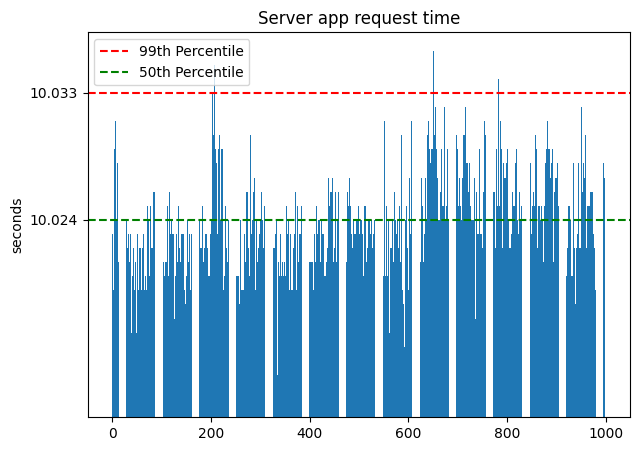

In [4]:
out_fig, out_ax = plot_data(out_data, 'seconds', 1000, 'Server app request time', 'seconds')
out_fig.savefig('server_1000.png')

In [5]:
producer_out = pd.read_csv("Producer/producer_out_1000.data", sep='\t')
producer_out

,starttime,ttime,endtime
0,1.704054e+09,0.000068,1.704054e+09
1,1.704054e+09,0.000071,1.704054e+09
2,1.704054e+09,0.000050,1.704054e+09
3,1.704054e+09,0.000047,1.704054e+09
4,1.704054e+09,0.000053,1.704054e+09
...,...,...,...
995,1.704054e+09,0.000079,1.704054e+09
996,1.704054e+09,0.000086,1.704054e+09
997,1.704054e+09,0.000090,1.704054e+09
998,1.704054e+09,0.000091,1.704054e+09


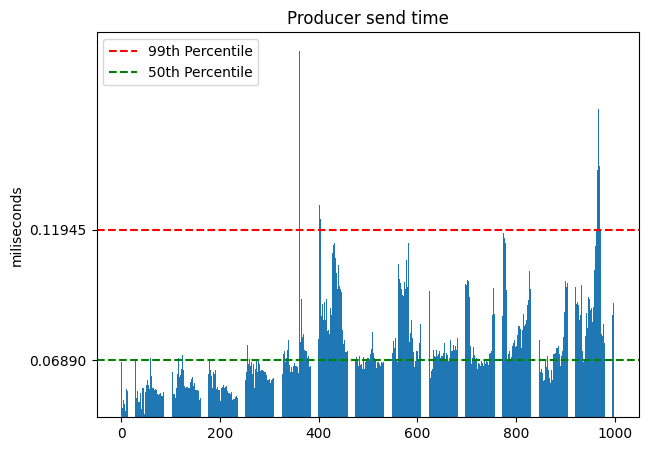

In [6]:
producer_fig, producer_ax = plot_data(producer_out, 'starttime', 0.001, 'Producer send time', 'miliseconds')
producer_fig.savefig('producer_1000.png')

In [ ]:
consumer_out = pd.read_csv("Consumer/consumer.data", sep='\t')
consumer_out

In [ ]:
consumer_fig, consumer_ax = plot_data(consumer_out, 'starttime', 1, 'Consumer process time', 'seconds')
consumer_fig.savefig('consumer_1000.png')